In [1]:
from mcp_persor import BVHparser
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib


In [2]:
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    plt.legend()

    plt.show()

def plot_pos(
    df,
    figsize=(10, 3),
):
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(df['time'].min(), df['time'].max())
    fig, ax = plt.subplots()
    sc = ax.scatter(df['root_Zposition'], df['root_Xposition'], c=df['time'], cmap=cmap, norm=norm)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Time')
    fig.set_size_inches(figsize[0], figsize[1])

    plt.show()


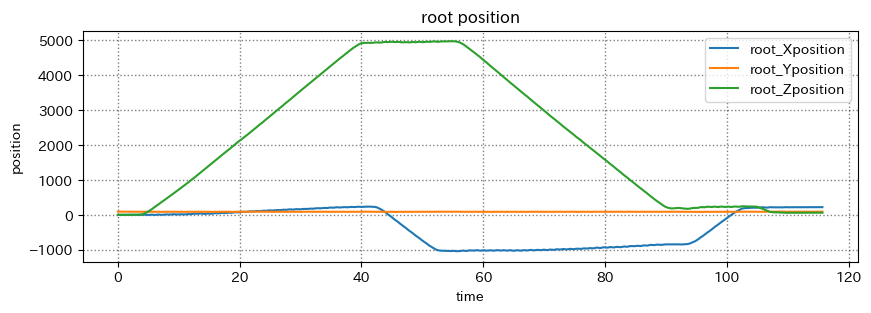

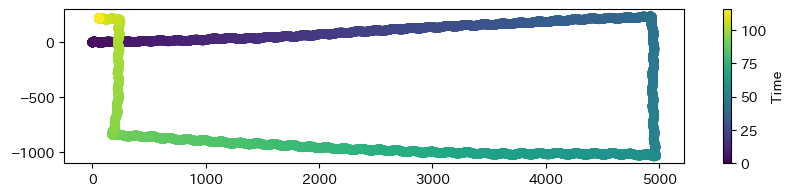

In [7]:
# BVHファイル読み込み
bvhp = BVHparser('./2023-12/walk_square/walk_square.bvh')

motion_df = bvhp.get_motion_df()

plot(
    motion_df,
    heads=[
        ('time', 'root_Xposition'),
        ('time', 'root_Yposition'),
        ('time', 'root_Zposition'),
    ],
    title='root position',
    xlabel='time',
    ylabel='position',
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
)

plot_pos(motion_df, figsize=(10, 2))
